## Observations and Insights 

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
combine_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [141]:
# Checking the number of mice.
mice_count = len(combine_data['Mouse ID'].unique())
print(mice_count)

249


In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_count = combine_data.loc[combine_data.duplicated(subset=["Mouse ID", 'Timepoint']), 'Mouse ID'].unique()


In [143]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_id=pd.DataFrame(duplicate_mice_count)
all_duplicate_id

,0
0,g989


In [144]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[combine_data['Mouse ID'].isin(duplicate_mice_count) ==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [145]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_data["Mouse ID"].unique())
print(mouse_count)

248


## Summary Statistics

In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df= clean_data.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = summary_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = summary_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = summary_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
st_dev = summary_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = summary_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
single_summary_df= pd.DataFrame({"Tumor Volume Mean":mean,"Tumor Volume Median":median,"Tumor Volume Var":variance, "Tumor Volume STD": st_dev, "Tumor Volume SEM": sem})


single_summary_df = single_summary_df.round(2)
single_summary_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Var,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

single_group_by = clean_data.groupby("Drug Regimen")
single_summary_df_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
single_summary_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

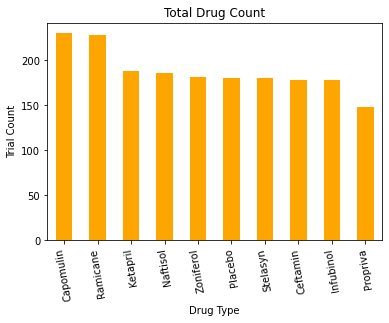

In [148]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
pandas_drug_counts= clean_data["Drug Regimen"].value_counts()
y_axis= pandas_drug_counts.values
x_axis= pandas_drug_counts.index


pandas_drug_counts.plot(kind="bar", facecolor='orange',)

# Format Bar Plot
plt.ylabel("Trial Count")
plt.xlabel("Drug Type")
plt.title("Total Drug Count")
plt.xticks(rotation=100)
plt.show()

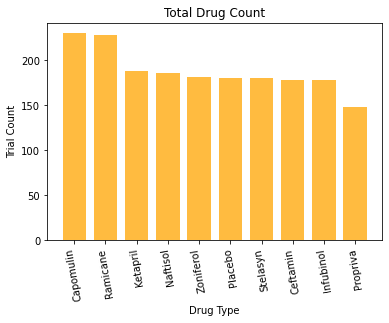

In [149]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_counts_2= clean_data["Drug Regimen"].value_counts()

y_axis=drug_counts_2.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts_2.index
                 
#Needs to be matplotlib
plt.bar(x_drugs, y_axis, color='orange', alpha=0.75, align= "center", width= .75)

#Formatting
plt.ylabel("Trial Count")
plt.xlabel("Drug Type")
plt.title("Total Drug Count")
plt.xticks(rotation=100)

plt.show()


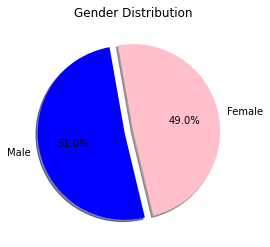

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_mf_count = clean_data["Sex"].value_counts()
labels = mice_mf_count.values
sizes = mice_mf_count.values

# Color for female vs. male 
colors =["blue", "pink"]
explode =[0.1, 0]

mice_mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)

#Formate Pie Chart Pandas
plt.title("Gender Distribution")
plt.ylabel(" ")
plt.show()

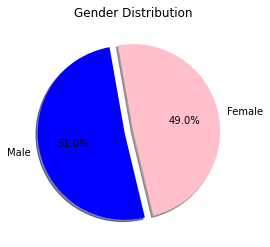

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_mf_count_2 = clean_data["Sex"].value_counts()

labels = mice_mf_count_2.index
sizes = mice_mf_count_2.values

# Color for female vs. male 
colors =["blue", "pink"]
explode =[0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)

#Formate Pie Chart PyPlot
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [218]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor=clean_data.groupby("Mouse ID").max().reset_index()

merged_data=final_tumor[["Mouse ID","Timepoint"]].merge(clean_data, on=["Mouse ID","Timepoint"], how='left')

merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [229]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane_data = merged_data.loc[merged_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol_data = merged_data.loc[merged_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'] 
ceftamin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

In [230]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

    #Capomulin Quartiles and IQR and Outliers 
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap

lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

#Ramicane Quartiles and IQR and Outliers
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram

lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

#Infubionol Quartiles and IQR and Outliers
quartile_inf=infubinol.quantile([.25,.5,.75])
lower_inf= quartile_inf[.25]
upper_inf=quartile_inf[.75]
iqr= upper_inf-lower_inf

lower_oinf= lower_inf-(1.5*iqr)
upper_oinf= upper_inf+(1.5*iqr)

#Ceftmain Quartiles and IQR and Outliers
quartile_cef=ceftamin.quantile([.25,.5,.75])
lower_cef= quartile_cef[.25]
upper_cef=quartile_cef[.75]
iqr= upper_cef-lower_cef

lower_ocef= lower_cef-(1.5*iqr)
upper_ocef= upper_cef+(1.5*iqr)

In [216]:
print(f"Capomulin potential below values {round(lower_ocap, 2)} is considered an outlier")
print(f"Capomulin potential above values {round(upper_ocap, 2)} is considered an outlier")

print(f"Ramicane potential below values {round(lower_oram, 2)} is considered an outlier")
print(f"Ramicane potential above values {round(upper_oram, 2)} is considered an outlier")

print(f"Infubionol potential below values {round(lower_oinf, 2)} is considered an outlier")
print(f"Infubionol potential above values {round(upper_oinf, 2)} is considered an outlier")

print(f"Ceftmain potential below values {round(lower_ocef, 2)} is considered an outlier")
print(f"Ceftmain potential above values {round(upper_ocef, 2)} is considered an outlier")

Capomulin potential below values 20.7 is considered an outlier
Capomulin potential above values 51.83 is considered an outlier
Ramicane potential below values 17.91 is considered an outlier
Ramicane potential above values 54.31 is considered an outlier
Infubionol potential below values 36.83 is considered an outlier
Infubionol potential above values 82.74 is considered an outlier
Ceftmain potential below values 25.36 is considered an outlier
Ceftmain potential above values 87.67 is considered an outlier


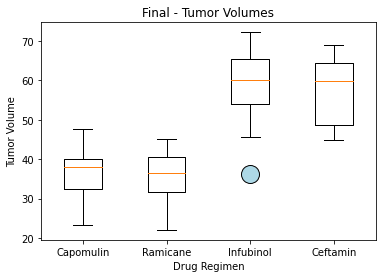

In [228]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= blue_out)
blue_out = dict(markerfacecolor='lightblue',markersize=18)

#Format 
plt.title("Final - Tumor Volumes")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

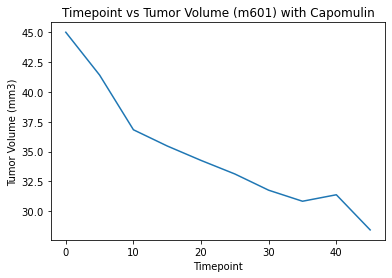

In [232]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
line_plot_df = clean_data.loc[clean_data["Mouse ID"] == "m601",:]
line_plot_df.head()

plt.plot(line_plot_df["Timepoint"], line_plot_df["Tumor Volume (mm3)"])
plt.title("Timepoint vs Tumor Volume (m601) with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

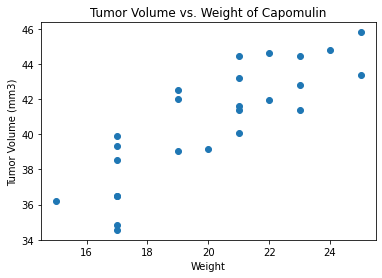

In [114]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_wt= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

cap_avg= capomulin_wt.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.title("Tumor Volume vs. Weight of Capomulin")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [110]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation= round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between the average tumor volume and mouse weight {correlation}")

The correlation between the average tumor volume and mouse weight 0.84


In [96]:
lin_reg_data =st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(lin_reg_data)

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


In [112]:
# Cap_Avg Data_Lin_Reg_Data
slope=0.9544396890241045
intercept=21.552160532685015
rvalue=0.8419363424694718
pvalue=1.3225722434712642e-07
stderr=0.1275435903320134

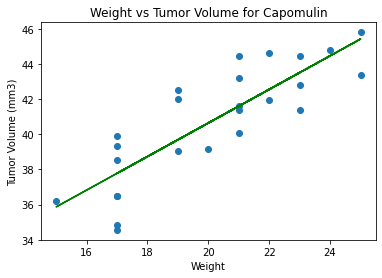

In [231]:
y_data_values = cap_avg['Weight (g)']* slope + intercept

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], y_data_values, color='green')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")

plt.show()


In [ ]:
# References
    Boxplots in matplotlib: Markers and outliers. (n.d.). Stack Overflow. https://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers

    How to add some statistics to the plot in Python. (n.d.). Stack Overflow. https://stackoverflow.com/questions/34243737/how-to-add-some-statistics-to-the-plot-in-python

    How to plot value counts for each subset in matplotlib/seaborn? (n.d.). Stack Overflow. https://stackoverflow.com/questions/63940682/how-to-plot-value-counts-for-each-subset-in-matplotlib-seaborn

    Scipy.stats.linregress — SciPy v1.5.2 reference guide. (n.d.). Numpy and Scipy Documentation — Numpy and Scipy documentation. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html